In [2]:
from keras import layers
from keras import models

model = models.Sequential()
#首层接收2维输入
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0       

In [3]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs = 5, batch_size=64)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 22s 364us/step - loss: 0.1625 - acc: 0.9483
Epoch 2/5
60000/60000 [==============================] - 24s 399us/step - loss: 0.0452 - acc: 0.9866
Epoch 3/5
60000/60000 [==============================] - 28s 460us/step - loss: 0.0309 - acc: 0.9905
Epoch 4/5
60000/60000 [==============================] - 30s 505us/step - loss: 0.0237 - acc: 0.9928
Epoch 5/5
10000/10000 [==============================] - 2s 175us/step
0.9908


In [5]:
import os
base_dir = '/Users/apple/Documents/人工智能出书/数据/第7章/cat-and-dog'
train_cats_dir = os.path.join(base_dir, 'training_set/cats')
train_dogs_dir = os.path.join(base_dir, 'training_set/dogs')
test_cats_dir = os.path.join(base_dir, 'test_set/cats')
test_dogs_dir = os.path.join(base_dir, 'test_set/dogs')

print('total trainning cat images: ', len(os.listdir(train_cats_dir)))
print('total trainning dog images: ', len(os.listdir(train_dogs_dir)))
print('total testing cat images: ', len(os.listdir(test_cats_dir)))
print('total testing cat images: ', len(os.listdir(test_dogs_dir)))

total trainning cat images:  4001
total trainning dog images:  4006
total testing cat images:  1012
total testing cat images:  1013


In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3),  activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [9]:
from keras import preprocessing
from keras.preprocessing import image

import numpy as np 

path_cats = []
for path in os.listdir(train_cats_dir):
    if '.jpg' in path:
        path_cats.append(os.path.join(train_cats_dir, path))
path_dogs = []
for path in os.listdir(train_dogs_dir):
    if '.jpg' in path:
        path_dogs.append(os.path.join(train_dogs_dir, path))


training_set = np.zeros((6000, 150, 150, 3), dtype='float32')
train_dog_imgs = 3000
train_cat_imgs = 3000
for i in range(0, train_dog_imgs):
    img = preprocessing.image.load_img(path_dogs[i], target_size=(150,150))
    training_set[i] = preprocessing.image.img_to_array(img)
for j in range(0, train_cat_imgs):
    img = preprocessing.image.load_img(path_cats[j], target_size=(150,150))
    training_set[train_dog_imgs+j] = preprocessing.image.img_to_array(img)


validation_set = np.zeros((2000, 150, 150, 3), dtype='float32')
validation_dog_imgs = 1000
validation_cat_imgs = 1000
for i in range(validation_dog_imgs):
    path = path_dogs[i + train_dog_imgs] 
    img = preprocessing.image.load_img(path, target_size=(150,150))
    validation_set[i] = preprocessing.image.img_to_array(img)
for j in range(validation_cat_imgs):
    path = path_cats[j+train_cat_imgs]
    img = preprocessing.image.load_img(path, target_size=(150,150))
    validation_set[j+validation_dog_imgs] = preprocessing.image.img_to_array(img)


In [10]:
train_labels = np.zeros((3000,))
#猫图片打标签1
train_labels = np.concatenate((train_labels, np.ones(3000, )))
validation_labels = np.zeros((1000, ))
validation_labels = np.concatenate((validation_labels, np.ones(1000, )))

In [11]:
train_datagen = preprocessing.image.ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(training_set, train_labels, 
                                         batch_size = 32)
validation_generator = train_datagen.flow(validation_set, validation_labels,
                                         batch_size=32)

history = model.fit_generator(train_generator, steps_per_epoch=100,
                             epochs = 30, validation_steps=50,
                             validation_data=validation_generator)

Epoch 1/30
100/100 [==============================] - 102s 1s/step - loss: 0.7488 - acc: 0.5419 - val_loss: 0.6631 - val_acc: 0.6181
Epoch 2/30
100/100 [==============================] - 135s 1s/step - loss: 0.6589 - acc: 0.6131 - val_loss: 0.5969 - val_acc: 0.6681
Epoch 3/30
100/100 [==============================] - 140s 1s/step - loss: 0.6150 - acc: 0.6669 - val_loss: 0.5965 - val_acc: 0.6869
Epoch 4/30
100/100 [==============================] - 140s 1s/step - loss: 0.5616 - acc: 0.7150 - val_loss: 0.5264 - val_acc: 0.7238
Epoch 5/30
100/100 [==============================] - 141s 1s/step - loss: 0.5284 - acc: 0.7472 - val_loss: 0.5034 - val_acc: 0.7544
Epoch 6/30
100/100 [==============================] - 122s 1s/step - loss: 0.5018 - acc: 0.7569 - val_loss: 0.4769 - val_acc: 0.7750
Epoch 7/30
100/100 [==============================] - 120s 1s/step - loss: 0.4548 - acc: 0.7878 - val_loss: 0.5498 - val_acc: 0.7569
Epoch 8/30
100/100 [==============================] - 127s 1s/step - 

In [46]:
model.save('cats_and_dogs_small_1.h5')

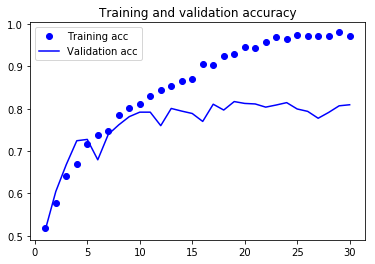

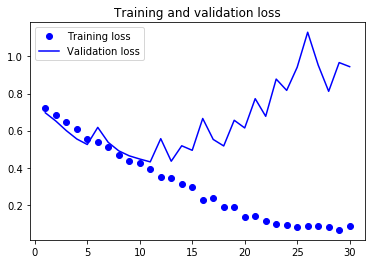

In [47]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [9]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt

datagen = ImageDataGenerator(rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,
                            shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, fill_mode = 'nearest')

fnames = [os.path.join(train_dogs_dir, fname) for fname in os.listdir(train_dogs_dir)]


#从狗图片中选择一张
img_path = fnames[3]
print(img_path)

img = image.load_img(img_path, target_size=(150,150))
img = image.img_to_array(img)
#把img变成3维向量形式[1,150,150]
img = img.reshape((1,) + img.shape)
i = 0
#对图片做输入参数中指定的6种变换
f, ax = plt.subplots(1, 6)
for batch in datagen.flow(img, batch_size=1):
    imgplot = ax[i].imshow(image.array_to_img(batch[0]))
    ax[i].axis('off')
    i += 1
    if i % 6 == 0:
        break
plt.show()


/Users/chenyi/Documents/人工智能/cat-and-dog/training_set/dogs/dog.3622.jpg


<Figure size 640x480 with 6 Axes>

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3),  activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [10]:
#执行这里的代码时，记住把网络构造部分的代码再执行一次以便确保我们训练的是一个新网络
train_datagen = ImageDataGenerator(rescale = 1. / 255, rotation_range = 40, width_shift_range = 0.2,
                                  height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2,
                                  horizontal_flip = True,)
train_generator = train_datagen.flow(training_set, train_labels, batch_size = 32)
validation_datagen = ImageDataGenerator(rescale = 1. / 255)
validation_generator = validation_datagen.flow(validation_set, validation_labels, batch_size = 32)
history = model.fit_generator(train_generator, steps_per_epoch=100,
                             epochs = 30, validation_data = validation_generator,
                             validation_steps = 50)


Epoch 1/30
100/100 [==============================] - 105s 1s/step - loss: 0.7605 - acc: 0.5391 - val_loss: 0.6916 - val_acc: 0.5056
Epoch 2/30
100/100 [==============================] - 129s 1s/step - loss: 0.6951 - acc: 0.5766 - val_loss: 0.6626 - val_acc: 0.5919
Epoch 3/30
100/100 [==============================] - 144s 1s/step - loss: 0.6817 - acc: 0.5894 - val_loss: 0.6634 - val_acc: 0.6212
Epoch 4/30
100/100 [==============================] - 139s 1s/step - loss: 0.6722 - acc: 0.6106 - val_loss: 0.6323 - val_acc: 0.6125
Epoch 5/30
100/100 [==============================] - 145s 1s/step - loss: 0.6686 - acc: 0.6194 - val_loss: 0.7858 - val_acc: 0.5350
Epoch 6/30
100/100 [==============================] - 145s 1s/step - loss: 0.6497 - acc: 0.6316 - val_loss: 0.6138 - val_acc: 0.6525
Epoch 7/30
100/100 [==============================] - 140s 1s/step - loss: 0.6431 - acc: 0.6472 - val_loss: 0.6460 - val_acc: 0.6188
Epoch 8/30
100/100 [==============================] - 145s 1s/step - 

In [13]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

(1, 150, 150, 3)


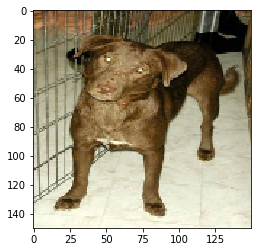

In [14]:
from keras.preprocessing import image

img_path = os.path.join(train_dogs_dir, 'dog.1.jpg')
img = image.load_img(img_path, target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)
plt.imshow(img_tensor[0])

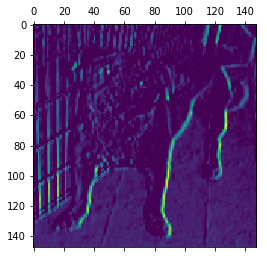

In [15]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)

layer_show = 0
channel = 18

layer_activation = activations[layer_show]
plt.matshow(layer_activation[0,:,:,channel], cmap='viridis')

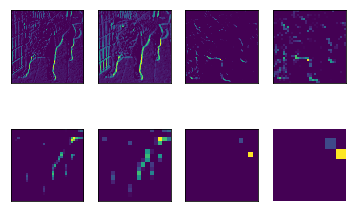

In [24]:
fig, ax = plt.subplots(2, 4)
plt.axis('off')

for i in range(0, 2):
    for j in range(0, 4):
        layer_activation = activations[i*4 + j]
        ax[i, j].matshow(layer_activation[0,:,:,9], cmap='viridis')
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])